In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
PG = wb.DataReader('PG',data_source = 'yahoo',start = '1995-1-1')

In [3]:
PG.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-04-20,164.479996,160.000000,160.500000,163.649994,10196100.0,162.736984
2022-04-21,164.899994,162.429993,163.820007,162.610001,9365700.0,162.610001
2022-04-22,163.520004,160.910004,163.240005,161.250000,9393600.0,161.250000
2022-04-25,163.289993,159.800003,161.699997,162.550003,6967900.0,162.550003
2022-04-26,163.630005,162.000000,162.679993,162.490005,1904476.0,162.490005


 # Simple rate of return
 ### (P1-P0)/P0 = (P1/P0 )-1

In [4]:
PG['Simple_return'] = (PG['Adj Close']/PG['Adj Close'].shift(1))-1
print (PG['Simple_return'])

Date
1995-01-03         NaN
1995-01-04   -0.008016
1995-01-05   -0.014141
1995-01-06    0.002049
1995-01-09   -0.004090
                ...   
2022-04-20    0.026598
2022-04-21   -0.000780
2022-04-22   -0.008364
2022-04-25    0.008062
2022-04-26   -0.000369
Name: Simple_return, Length: 6878, dtype: float64


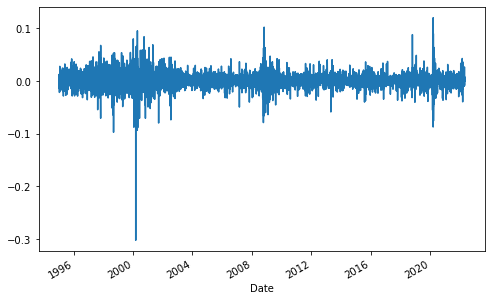

In [5]:
PG['Simple_return'].plot(figsize=(8,5))
plt.show()

In [6]:
avg_return_d =  PG['Simple_return'].mean()
avg_return_d

0.0005392837271274093

In [7]:
avg_return_a = PG['Simple_return'].mean()*250
avg_return_a

0.1348209317818523

In [8]:
print (str(round(avg_return_a,5)*100) +' %')

13.482 %


In [9]:
PG.head()

,High,Low,Open,Close,Volume,Adj Close,Simple_return
Date,,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,7.926646,NaN
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,7.863106,-0.008016
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,7.751915,-0.014141
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,7.767797,0.002049
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,7.736026,-0.004090


In [10]:
PG['Log_return'] = np.log(PG['Adj Close']/PG['Adj Close'].shift(1))
print(PG['Log_return'])

Date
1995-01-03         NaN
1995-01-04   -0.008048
1995-01-05   -0.014242
1995-01-06    0.002047
1995-01-09   -0.004099
                ...   
2022-04-20    0.026250
2022-04-21   -0.000781
2022-04-22   -0.008399
2022-04-25    0.008030
2022-04-26   -0.000369
Name: Log_return, Length: 6878, dtype: float64


<AxesSubplot:xlabel='Date'>

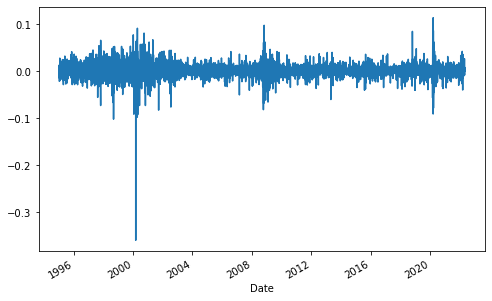

In [11]:
PG['Log_return'].plot(figsize=(8,5))

In [12]:
Log_return_d = PG['Log_return'].mean()
Log_return_d

0.00043920118229958223

In [13]:
log_return_a = PG['Log_return'].mean()*250
log_return_a

0.10980029557489555

In [14]:
print (str(round(log_return_a,6) * 100) + '%')

10.979999999999999%


# Return of Portfolio

In [15]:
tickers = ['PG','MSFT','F','GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t,data_source = 'yahoo', start = '1995-1-1')['Adj Close']

In [16]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,7.926649,2.369954,4.307287,32.847813
1995-01-04,7.863106,2.387181,4.423179,32.847813
1995-01-05,7.751910,2.347804,4.384546,32.928326
1995-01-06,7.767797,2.387181,4.384546,32.767296
1995-01-09,7.736031,2.372415,4.461810,32.445263


### Normalization to 100

In [17]:
mydata.iloc[0]

PG       7.926649
MSFT     2.369954
F        4.307287
GE      32.847813
Name: 1995-01-03 00:00:00, dtype: float64

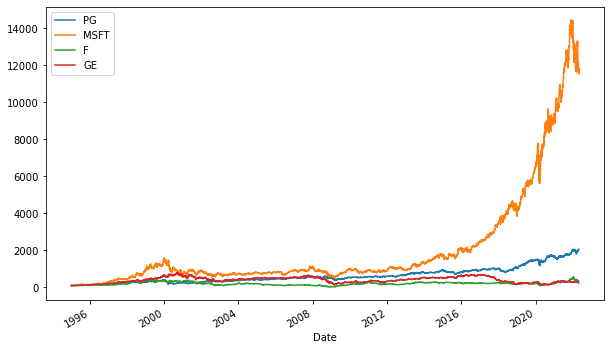

In [18]:
((mydata/mydata.iloc[0])*100).plot(figsize=(10,6));
plt.show()

### Return

In [19]:
returns = (mydata/mydata.shift(1))-1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014141,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016772,0.000000,-0.004890
1995-01-09,-0.004089,-0.006186,0.017622,-0.009828


In [20]:
weights = np.array([0.25,0.25,0.25,0.25])

In [21]:
annual_returns = (returns.mean())*250

In [22]:
np.dot(annual_returns,weights)

0.14144926173437714

In [23]:
pfolio_1 = str(round(np.dot(annual_returns,weights),5)*100)+' %'
print (pfolio_1)

14.145 %


In [24]:
weight_2 = np.array([0.4,0.4,0.15,0.05])

In [25]:
pfolio_2 = str(round(np.dot(annual_returns,weight_2),5)*100)+' %'
print (pfolio_1)
print (pfolio_2)

14.145 %
16.558 %


# Calculating the rate of return of indices

In [26]:
tickers1 = ['^GSPC','^IXIC','^GDAXI']
ind_data = pd.DataFrame()
for t in tickers1:
    ind_data[t] = wb.DataReader(t,data_source = 'yahoo', start = '1995-1-1')['Adj Close']

In [27]:
ind_data.tail()

,^GSPC,^IXIC,^GDAXI
Date,,,
2022-04-20,4459.450195,13453.070312,14362.030273
2022-04-21,4393.660156,13174.650391,14502.410156
2022-04-22,4271.779785,12839.290039,14142.089844
2022-04-25,4296.120117,13004.849609,13924.169922
2022-04-26,4219.310059,12638.402344,13958.230469


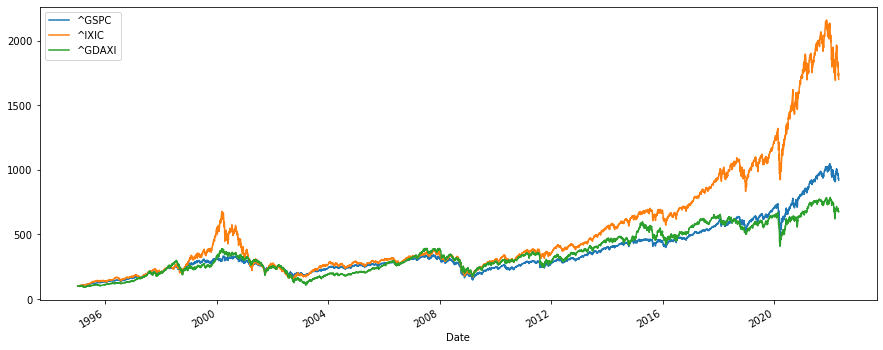

In [28]:
((ind_data/ind_data.iloc[0])*100).plot(figsize = (15,6));
plt.show()

In [29]:
ind_returns = (ind_data/ind_data.shift(1))-1
ind_returns.head()

,^GSPC,^IXIC,^GDAXI
Date,,,
1995-01-03,NaN,NaN,NaN
1995-01-04,0.003485,0.003039,0.001924
1995-01-05,-0.000803,-0.000241,-0.010343
1995-01-06,0.000739,0.005405,0.003285
1995-01-09,0.000326,0.003201,-0.002327


In [30]:
annual_ind_returns = ind_returns.mean()*250
annual_ind_returns

^GSPC     0.098637
^IXIC     0.132782
^GDAXI    0.083028
dtype: float64

In [31]:
tickers2 = ['PG','^GSPC','^DJI']
data_2 = pd.DataFrame()
for t in tickers2:
    data_2[t] = wb.DataReader(t, data_source = 'yahoo', start = '2007-1-1')['Adj Close']

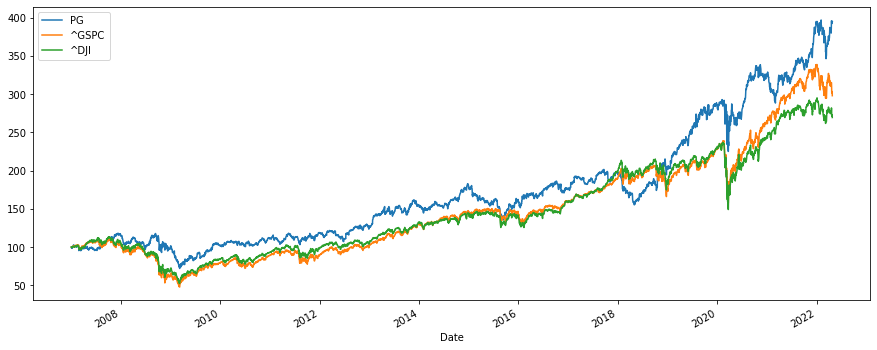

In [32]:
(data_2/data_2.iloc[0]*100).plot(figsize=(15,6));
plt.show()

# Security Risk

In [33]:
tickers = ['PG','BEI.DE']
sec_data = pd.DataFrame()
for t in tickers :
    sec_data[t] = wb.DataReader(t, data_source = 'yahoo', start = '1995-1-1')['Adj Close']

In [34]:
sec_data.head()

,PG,BEI.DE
Date,,
1995-01-03,7.926652,NaN
1995-01-04,7.863107,NaN
1995-01-05,7.751917,NaN
1995-01-06,7.767797,NaN
1995-01-09,7.736031,NaN


In [35]:
sec_returns = np.log(sec_data/sec_data.shift(1))
sec_returns.head()

,PG,BEI.DE
Date,,
1995-01-03,NaN,NaN
1995-01-04,-0.008049,NaN
1995-01-05,-0.014242,NaN
1995-01-06,0.002046,NaN
1995-01-09,-0.004098,NaN


### PG

In [36]:
sec_returns['PG'].mean()*250

0.10978683830385362

In [37]:
sec_returns['PG'].std()*250**.5

0.22476851387716323

### Beiersdorf

In [38]:
sec_returns['BEI.DE'].mean()*250

0.07596654983368949

In [39]:
sec_returns['BEI.DE'].std()*250**.5

0.2853025297849598

### Both Values in an array

In [40]:
sec_returns[['PG','BEI.DE']].mean()*250

PG        0.109787
BEI.DE    0.075967
dtype: float64

In [41]:
#sqr root of varience
sec_returns[['PG','BEI.DE']].std()*250**.5

PG        0.224769
BEI.DE    0.285303
dtype: float64

## Covarieance 

In [42]:
PG_Var = sec_returns['PG'].var()
PG_Var

0.00020208353932219412

In [43]:
BEI_Var = sec_returns['BEI.DE'].var()
BEI_Var

0.0003255901340067915

In [44]:
PG_Var_a = sec_returns['PG'].var()*250
PG_Var_a

0.05052088483054853

In [45]:
BEI_Var_a = sec_returns['BEI.DE'].var()*250
BEI_Var_a

0.08139753350169787

In [46]:
cov_matrix = sec_returns.cov()
cov_matrix

,PG,BEI.DE
PG,0.000202,0.000029
BEI.DE,0.000029,0.000326


In [47]:
cov_matrix_a = sec_returns.cov()*250
cov_matrix_a

,PG,BEI.DE
PG,0.050521,0.007173
BEI.DE,0.007173,0.081398


In [48]:
corr_matrix = sec_returns.corr()
corr_matrix

,PG,BEI.DE
PG,1.000000,0.111744
BEI.DE,0.111744,1.000000


# Calculating Portfolio Risk

In [49]:
weights = np.array([0.5,0.5])

### Portfolio Variance

In [51]:
pfolio_var = np.dot(weights.T,np.dot(sec_returns.cov()*250,weights))
pfolio_var

0.036565962580402775

### Portfolio Volatality

In [52]:
pfolio_vol = (np.dot(weights.T,np.dot(sec_returns.cov()*250,weights)))**0.5
pfolio_vol

0.1912222857838562

In [56]:
s = str(round(pfolio_vol,5)*100)+ ' %'
print (s)

19.122 %


# Diversifiable Risk

In [75]:
PG_Var_a = sec_returns['PG'].var()*250
PG_Var_a

0.05052088483054853

In [76]:
BEI_Var_a = sec_returns['BEI.DE'].var()*250
BEI_Var_a

0.08139753350169787

In [77]:
DR = pfolio_var - (weights[0]**2*PG_Var_a)-(weights[1]**2*BEI_Var_a)
DR

0.0035863579973411733

In [78]:
d = str(round(DR*100,3))+ ' %'

In [79]:
print(d)

0.359 %
